In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [2]:
# Read the data
ames = pd.read_csv("/Users/nicholaseah/Downloads/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

# Practice Activity 1

In [3]:
# Linear Regression
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1) # drop bc identification variables/response variable
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # do not predict new/unknown categories
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted = lr_pipeline_1.fit(X,y)
lr_pipeline_1.named_steps['linear_regression'].coef_

array([-4.39209773e+13, -4.39209773e+13, -4.39209773e+13, -4.39209773e+13,
       -4.39209773e+13, -4.39209773e+13,  1.25351924e+17,  1.25351924e+17,
        1.45951236e+17,  1.45951236e+17,  1.45951236e+17,  1.45951236e+17,
       -1.50298409e+17, -1.50298409e+17, -1.50298409e+17, -1.50298409e+17,
       -1.66599326e+16, -1.66599326e+16, -1.66599326e+16, -5.45591682e+16,
       -5.45591682e+16, -5.45591682e+16, -5.45591682e+16, -5.45591682e+16,
        1.55187350e+17,  1.55187350e+17,  1.55187350e+17, -3.79737514e+16,
       -3.79737514e+16, -3.79737514e+16, -3.79737514e+16, -3.79737514e+16,
       -3.79737514e+16, -3.79737514e+16, -3.79737514e+16, -3.79737514e+16,
       -3.79737514e+16, -3.79737514e+16, -3.79737514e+16, -3.79737514e+16,
       -3.79737514e+16, -3.79737514e+16, -3.79737514e+16, -3.79737514e+16,
       -3.79737514e+16, -3.79737514e+16, -3.79737514e+16, -3.79737514e+16,
       -3.79737514e+16, -3.79737514e+16, -3.79737514e+16, -3.79737514e+16,
       -3.79737514e+16, -

In [4]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-3.25778604e+20, -1.11398133e+20, -4.65615421e+19, -5.85460925e+21,
       -1.09610348e+19])

In [5]:
# Ridge Regression
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1) # drop bc identification variables/response variable
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # do not predict new/unknown categories
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

RidgeRegression_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha = 1))]
)
rr_pipeline_fitted = RidgeRegression_pipeline_1.fit(X,y)
RidgeRegression_pipeline_1.named_steps['ridge_regression'].coef_

array([-5.74005537e+03,  1.51192889e+03, -5.80970449e+03,  7.67632758e+03,
        3.21539362e+03, -8.53890229e+02, -8.79552355e+03,  8.79552355e+03,
        1.45341301e+03,  7.23134607e+03, -1.12842650e+04,  2.59950592e+03,
       -8.85774273e+03,  8.83533094e+03, -3.76931033e+03,  3.79172212e+03,
        9.87222450e+03, -9.85566573e+03, -1.65587708e+01,  5.24987685e+02,
        8.03779413e+03, -5.89576613e+03, -3.29412701e+03,  6.27111318e+02,
        1.71419540e+03,  8.13018428e+03, -9.84437968e+03, -3.92011921e+02,
        3.53090791e+03,  8.22359331e+03, -6.10737768e+03, -9.15175539e+03,
       -1.11524036e+04,  5.86971416e+03, -2.08430124e+04, -1.35674285e+04,
        4.54543167e+03,  6.73814593e+04, -1.25061940e+04, -2.54568140e+03,
        5.30277190e+02, -1.51451826e+04, -1.55880370e+04,  8.63701599e+03,
       -1.76666242e+04,  2.78073630e+04,  2.19158891e+04, -1.62260798e+04,
       -1.33304594e+04, -1.12074880e+04, -1.21292346e+04,  1.01105445e+04,
        3.67461043e+04, -

In [6]:
cross_val_score(RidgeRegression_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.8983804 , 0.91749817, 0.79251623, 0.78248152, 0.91492025])

In [7]:
x = lr_pipeline_1.named_steps['linear_regression'].coef_
y = RidgeRegression_pipeline_1.named_steps['ridge_regression'].coef_

dataset = pd.DataFrame({'LR': x, 'RR': y})
dataset.head()

,LR,RR
0,-4.392098e+13,-5740.055372
1,-4.392098e+13,1511.928887
2,-4.392098e+13,-5809.704488
3,-4.392098e+13,7676.327583
4,-4.392098e+13,3215.393618


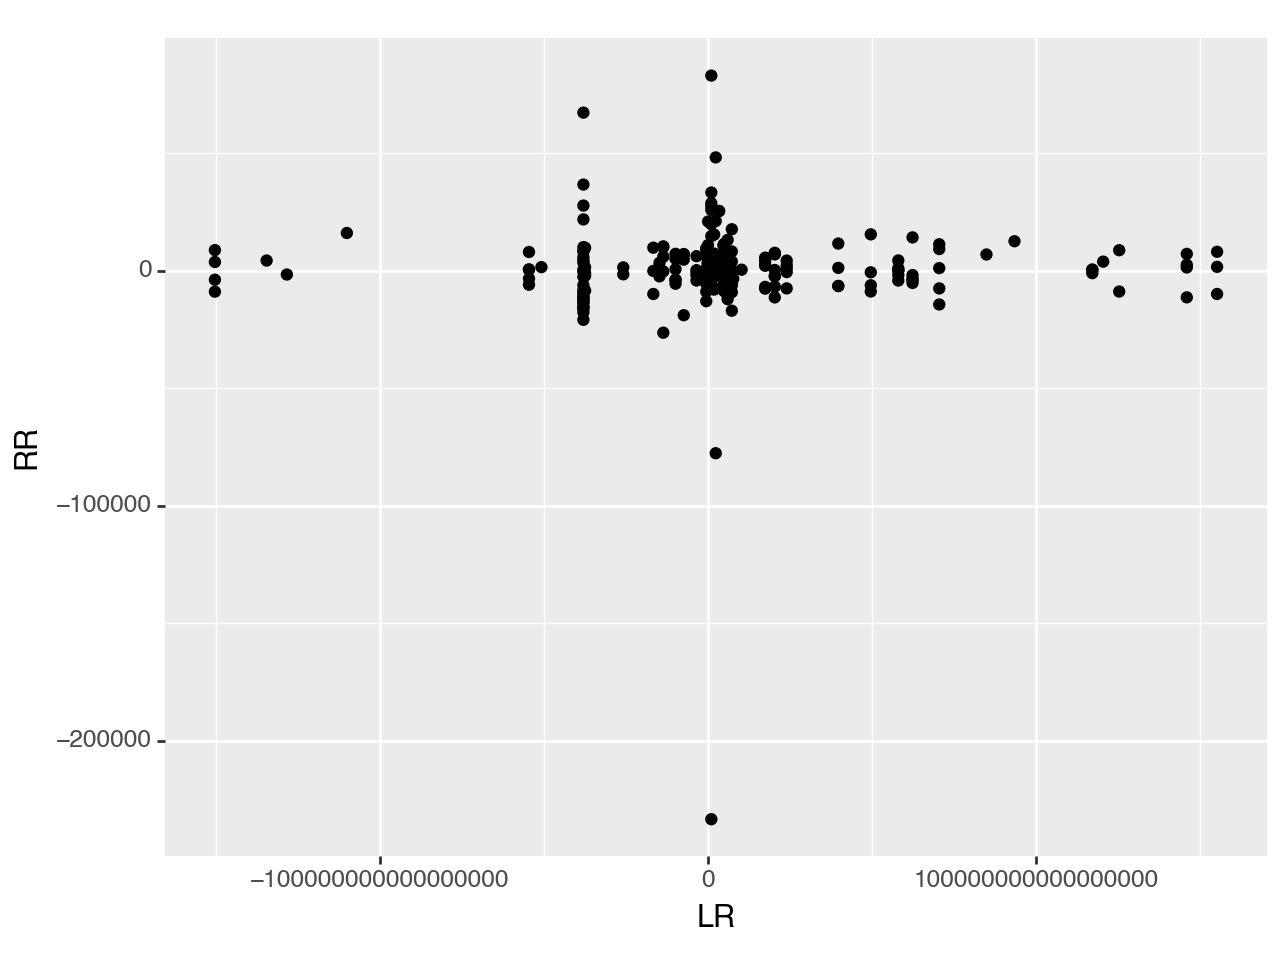

<Figure Size: (640 x 480)>

In [8]:
from plotnine import *

(ggplot(dataset,
aes(
  x = "LR",
  y = "RR"
))
+ geom_point()
)

# Practice Activity 2

In [9]:
from sklearn.model_selection import GridSearchCV

X = ames.drop(["SalePrice", "Order", "PID"], axis = 1) # drop bc identification variables/response variable
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # do not predict new/unknown categories
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

RidgeRegression_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

alpha = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10]}

gscv = GridSearchCV(RidgeRegression_pipeline_1, alpha, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"alpha": [0.001, 0.01, 0.1, 1, 10], "scores": gscv_fitted.cv_results_['mean_test_score']})

,alpha,scores
0,0.001,0.852945
1,0.010,0.853224
2,0.100,0.855423
3,1.000,0.861159
4,10.000,0.863355


# Practice Activity 3

In [10]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1) # drop bc identification variables/response variable
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # do not predict new/unknown categories
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

LASSORegression_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
)

alpha = {'lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10]}

gscv = GridSearchCV(LASSORegression_pipeline_1, alpha, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"alpha": [0.001, 0.01, 0.1, 1, 10], "scores": gscv_fitted.cv_results_['mean_test_score']})

/Users/nicholaseah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+11, tolerance: 1.348e+09
/Users/nicholaseah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+11, tolerance: 1.474e+09
/Users/nicholaseah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+11, tolerance: 1.463e+09
/Users/nicholaseah/anaconda3

,alpha,scores
0,0.001,0.854440
1,0.010,0.854549
2,0.100,0.855394
3,1.000,0.855890
4,10.000,0.859495


In [13]:
# Best R-squared with alpha = 10
LASSORegression_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha = 10))]
)
lasso_fitted = LASSORegression_pipeline_1.fit(X,y)
LASSORegression_pipeline_1.named_steps['lasso_regression'].coef_

array([-4.98858303e+03,  0.00000000e+00, -0.00000000e+00,  4.00181341e+03,
        2.14948506e+03, -2.11477605e+03, -1.59450790e+04,  6.35818301e-10,
       -1.20191692e+03,  4.04633342e+03, -0.00000000e+00,  0.00000000e+00,
       -9.66549017e+03,  5.20215419e+03, -9.22804541e+03,  1.84785086e+02,
        4.47757943e+03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.58680683e+03, -5.90434708e+03, -1.94634911e+03,  0.00000000e+00,
       -0.00000000e+00,  5.84192249e+03, -1.23322174e+04,  7.48644321e+03,
        7.91253765e+03,  1.34266297e+04,  3.24998752e+03, -0.00000000e+00,
       -2.60026242e+03,  1.43138097e+04, -1.07407923e+04, -4.02688778e+03,
        9.19393978e+03,  1.10738947e+05, -3.03284734e+03,  0.00000000e+00,
        6.62601594e+03, -6.46633247e+03, -6.33874747e+03,  1.39178351e+04,
       -8.86182281e+03,  3.47073682e+04,  2.72683598e+04, -6.92148410e+03,
       -4.03337169e+03, -1.80762219e+03, -3.25196177e+03,  1.78266699e+04,
        4.41965192e+04, -

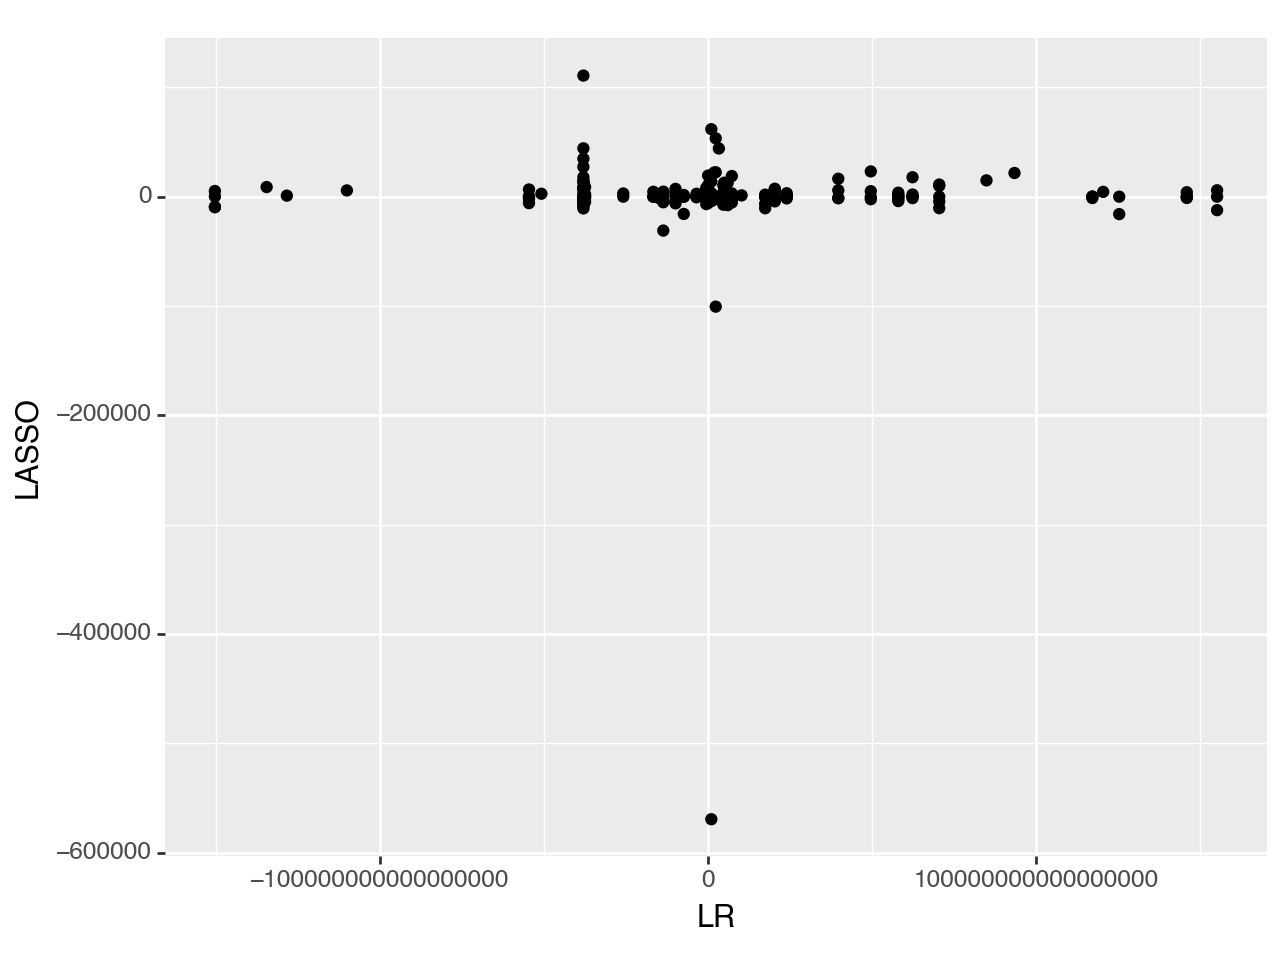

<Figure Size: (640 x 480)>

In [15]:
z = LASSORegression_pipeline_1.named_steps['lasso_regression'].coef_
y = LASSORegression_pipeline_1.named_steps['lasso_regression'].coef_
dataset = pd.DataFrame({'LR': x, 'LASSO': z, 'RR': y})


(ggplot(dataset,
aes(
  x = "LR",
  y = "LASSO"
))
+ geom_point()
)

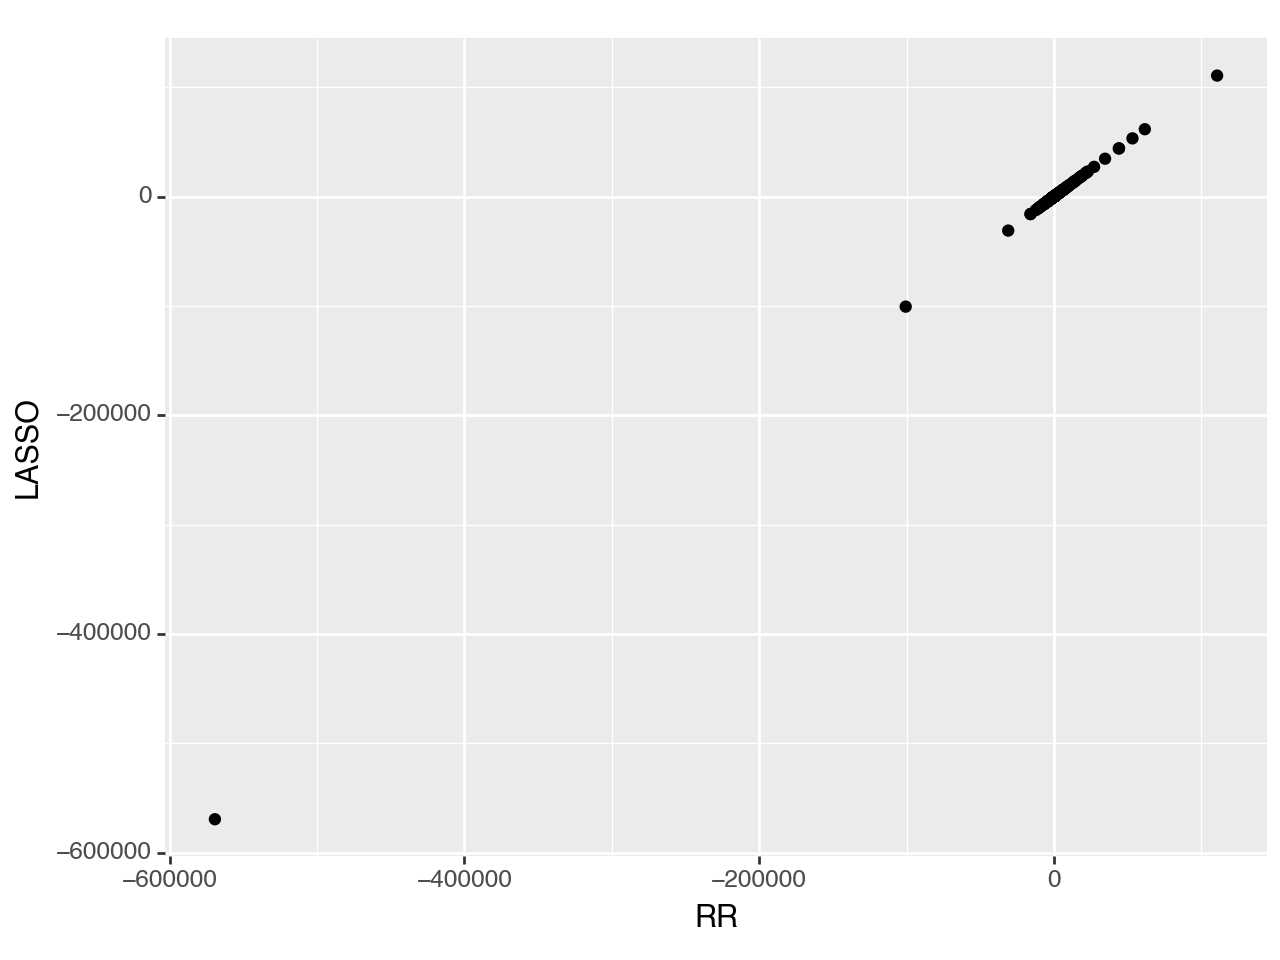

<Figure Size: (640 x 480)>

In [16]:
(ggplot(dataset,
aes(
  x = "RR",
  y = "LASSO"
))
+ geom_point()
)

# Practice Activity 4

In [18]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1) # drop bc identification variables/response variable
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # do not predict new/unknown categories
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ElasticNetPipeline = Pipeline(
  [("preprocessing", ct),
  ('elastic_net_regression', ElasticNet(alpha=1, l1_ratio=1))]
)

fitted_elastic_net_pipeline = ElasticNetPipeline.fit(X,y)
fitted_elastic_net_pipeline.named_steps['elastic_net_regression'].coef_

/Users/nicholaseah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+10, tolerance: 1.793e+09


array([-5.44483374e+03,  1.53107283e+03, -5.91129108e+03,  7.04052253e+03,
        3.42581683e+03, -1.10748714e+03, -1.92570268e+04,  3.73730013e-09,
       -1.46267421e+03,  4.45030047e+03, -8.73495152e+00,  1.61004526e-01,
       -9.23841683e+03,  5.29881603e+03, -1.10691207e+04,  1.25131799e+02,
        1.45344523e+04, -6.02419601e+03, -0.00000000e+00,  2.27851702e+02,
        6.72939809e+03, -6.08498179e+03, -3.73718071e+03,  0.00000000e+00,
       -0.00000000e+00,  6.34789898e+03, -2.12466202e+04,  7.43273645e+03,
        1.00657959e+04,  1.42896286e+04,  9.55939950e+02, -4.29546340e+03,
       -5.59427024e+03,  1.15593153e+04, -1.39579953e+04, -6.83811831e+03,
        1.21774192e+04,  1.33740764e+05, -5.70423832e+03,  0.00000000e+00,
        7.65342907e+03, -9.46906874e+03, -9.73398772e+03,  1.76113133e+04,
       -1.24040889e+04,  3.16431415e+04,  2.49778172e+04, -9.60745721e+03,
       -7.82431750e+03, -5.37313080e+03, -6.53908867e+03,  1.55512780e+04,
        4.30231947e+04, -

In [20]:
alphas = {'elastic_net_regression__alpha': [0.001, 0.01, 0.1, 0, 10]}
l1_ratios = {'elastic_net_regression__l1_ratios': [0.001, 0.01, 0.1, 0, 10]}
gscv = GridSearchCV(ElasticNetPipeline, alphas, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)
gscv_fitted.cv_results_

/Users/nicholaseah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+11, tolerance: 1.348e+09
/Users/nicholaseah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+11, tolerance: 1.474e+09
/Users/nicholaseah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+11, tolerance: 1.463e+09
/Users/nicholaseah/anaconda3

/Users/nicholaseah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.915e+11, tolerance: 1.477e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


{'mean_fit_time': array([0.70988379, 0.71457534, 0.84309211, 0.80619345, 0.22671318]),
 'std_fit_time': array([0.04585203, 0.05244156, 0.17909964, 0.15093249, 0.06704982]),
 'mean_score_time': array([0.01800909, 0.01786909, 0.0228178 , 0.0217948 , 0.01690526]),
 'std_score_time': array([0.00208638, 0.00251238, 0.00660179, 0.0103714 , 0.00094337]),
 'param_elastic_net_regression__alpha': masked_array(data=[0.001, 0.01, 0.1, 0, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'elastic_net_regression__alpha': 0.001},
  {'elastic_net_regression__alpha': 0.01},
  {'elastic_net_regression__alpha': 0.1},
  {'elastic_net_regression__alpha': 0},
  {'elastic_net_regression__alpha': 10}],
 'split0_test_score': array([0.89845958, 0.89846254, 0.89850667, 0.89845914, 0.90126483]),
 'split1_test_score': array([0.90958752, 0.90959277, 0.90965082, 0.90958696, 0.91466516]),
 'split2_test_score': array([0.78788765, 0.78843197, 0